## Setup

### imports

In [1]:
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

### definitions

In [3]:
path_data_dir = '../data/'

In [4]:
list_assets = ["PETR3.SA","PRIO3.SA", "VALE3.SA", "GGBR3.SA", "ABCB4.SA", "ITUB3.SA", "FLRY3.SA", "RADL3.SA"]

In [5]:
relevant_cols = ['Date', 'Close', 'Volume']

## Data 

In [7]:
dict_dfs = {}
for asset in list_assets:

    df = pd.read_csv(path_data_dir + f"processed/train_price_history_{asset.replace('.', '_')}_meta_dataset_ffill.csv", index_col= 0)
    
    dict_dfs.update({asset:df})

In [8]:
dict_dfs

{'PETR3.SA':                 Close      Volume      SMA_7    MSTD_7     SMA_14   MSTD_14  \
 Date                                                                          
 2010-12-22  28.490000   3146900.0  28.330000  0.263376  28.315714  0.319512   
 2010-12-23  28.540001   2006300.0  28.337143  0.269055  28.312857  0.317137   
 2010-12-24  28.540001   2006300.0  28.337143  0.269055  28.312857  0.317137   
 2010-12-25  28.540001   2006300.0  28.337143  0.269055  28.312857  0.317137   
 2010-12-26  28.540001   2006300.0  28.337143  0.269055  28.312857  0.317137   
 ...               ...         ...        ...       ...        ...       ...   
 2021-07-06  28.580000  26086000.0  29.615715  0.554102  29.440000  0.509525   
 2021-07-07  28.730000  15385400.0  29.537143  0.641709  29.445000  0.501563   
 2021-07-08  28.160000  13636300.0  29.320000  0.818210  29.403572  0.581809   
 2021-07-09  28.160000  13636300.0  29.320000  0.818210  29.403572  0.581809   
 2021-07-10  28.160000  1363

In [18]:
def create_joint_df(dict_dfs, col):
    
    df_final = pd.DataFrame({})

    for asset, df in dict_dfs.items():
            
        df_rel = df[col].reset_index()
        
        df_rel.rename({col: asset},axis= 1, inplace = True)
        
        
        if len(df_final) == 0:
            
            df_final = df_rel
        else:
        
            df_final = df_final.merge(
                df_rel,
                on = 'Date',
                how = 'left'
            )
            
    return df_final    


# df_dp = create_joint_df(dict_dfs, 'diff_close_mean_z_score_21')

# df_dp.Date = pd.to_datetime(df_dp.Date)
# df_dp.set_index("Date", inplace=True)
# df_dp

# df_dp_int = df_dp.copy()
# for asset in list_assets:
    
#     df_dp_int[asset] = df_dp_int[asset].apply(int)
    
    
# df_dp_int

df_close = create_joint_df(dict_dfs, 'Close')
df_close.Date = pd.to_datetime(df_close.Date)
df_close.set_index("Date", inplace=True)
df_close

,PETR3.SA,PRIO3.SA,VALE3.SA,GGBR3.SA,ABCB4.SA,ITUB3.SA,FLRY3.SA,RADL3.SA
Date,,,,,,,,
2010-12-22,28.490000,31.500999,57.029999,13.730158,10.323810,14.115611,11.843924,2.778846
2010-12-23,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
2010-12-24,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
2010-12-25,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
2010-12-26,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
...,...,...,...,...,...,...,...,...
2021-07-06,28.580000,20.240000,113.769997,20.396826,14.882663,26.190001,23.433243,23.701923
2021-07-07,28.730000,19.840000,114.099998,20.849207,14.951337,26.469999,23.744429,24.903847
2021-07-08,28.160000,19.580000,113.660004,20.301586,14.813989,26.219999,23.310654,24.644230


## Analysis

### close price

In [20]:
df_close.rename({col:col.replace(".SA", "") for col in df_close.columns},axis=1).describe()

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000
mean,20.036152,5.806712,40.917361,9.679926,12.276879,20.145173,15.953559,10.426533
std,6.695088,8.452488,19.812291,3.678181,3.874740,6.191019,7.459852,7.107494
min,5.910000,0.138000,8.600000,1.968253,6.078577,9.931015,6.318017,1.944230
25%,14.980000,0.757800,28.912500,7.642857,8.931664,14.710855,9.025570,3.945673
50%,19.520000,1.998000,38.320000,9.642857,11.159147,18.292011,12.093816,10.041345
75%,24.957500,6.870000,50.340000,11.537698,15.690746,25.267500,23.666632,14.615384
max,33.650002,43.400002,118.720001,24.595238,23.110640,33.430000,31.590086,27.250000


In [21]:
print(df_close.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe().round(2).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & PETR3 & PRIO3 & VALE3 & GGBR3 & ABCB4 & ITUB3 & FLRY3 & RADL3 \\
\midrule
count & 3854.00 & 3854.00 & 3854.00 & 3854.00 & 3854.00 & 3854.00 & 3854.00 & 3854.00 \\
mean & 20.04 & 5.81 & 40.92 & 9.68 & 12.28 & 20.15 & 15.95 & 10.43 \\
std & 6.70 & 8.45 & 19.81 & 3.68 & 3.87 & 6.19 & 7.46 & 7.11 \\
min & 5.91 & 0.14 & 8.60 & 1.97 & 6.08 & 9.93 & 6.32 & 1.94 \\
25% & 14.98 & 0.76 & 28.91 & 7.64 & 8.93 & 14.71 & 9.03 & 3.95 \\
50% & 19.52 & 2.00 & 38.32 & 9.64 & 11.16 & 18.29 & 12.09 & 10.04 \\
75% & 24.96 & 6.87 & 50.34 & 11.54 & 15.69 & 25.27 & 23.67 & 14.62 \\
max & 33.65 & 43.40 & 118.72 & 24.60 & 23.11 & 33.43 & 31.59 & 27.25 \\
\bottomrule
\end{tabular}



<Axes: >

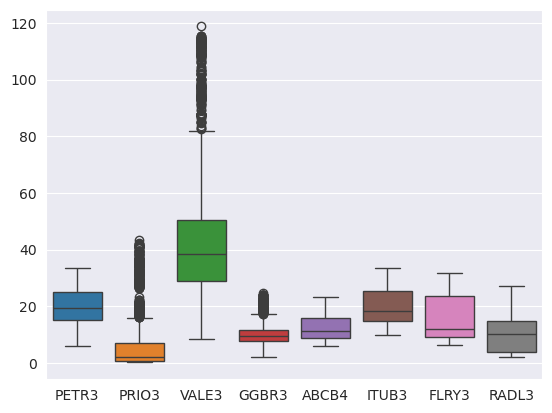

In [23]:
sns.boxplot(data=df_close.rename({col:col.replace(".SA", "") for col in df_close.columns},axis=1))

#### correlation

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
PETR3,1.000000,0.561865,0.710211,0.660714,0.471424,0.467678,0.439361,0.299406
PRIO3,0.561865,1.000000,0.561729,0.558254,-0.144875,-0.193666,0.000721,-0.062494
VALE3,0.710211,0.561729,1.000000,0.890535,0.405356,0.444325,0.541128,0.563834
GGBR3,0.660714,0.558254,0.890535,1.000000,0.261737,0.226137,0.378919,0.325067
ABCB4,0.471424,-0.144875,0.405356,0.261737,1.000000,0.923550,0.874349,0.749660
ITUB3,0.467678,-0.193666,0.444325,0.226137,0.923550,1.000000,0.824590,0.794888
FLRY3,0.439361,0.000721,0.541128,0.378919,0.874349,0.824590,1.000000,0.867051
RADL3,0.299406,-0.062494,0.563834,0.325067,0.749660,0.794888,0.867051,1.000000


None


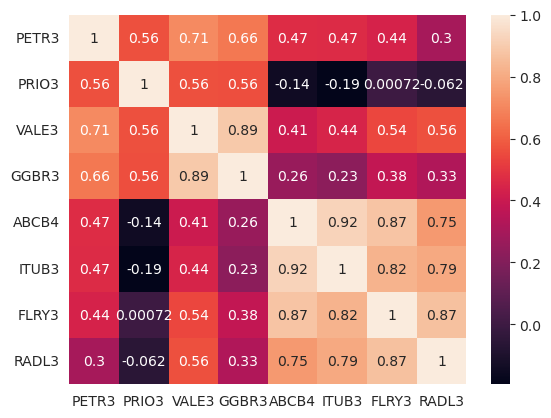

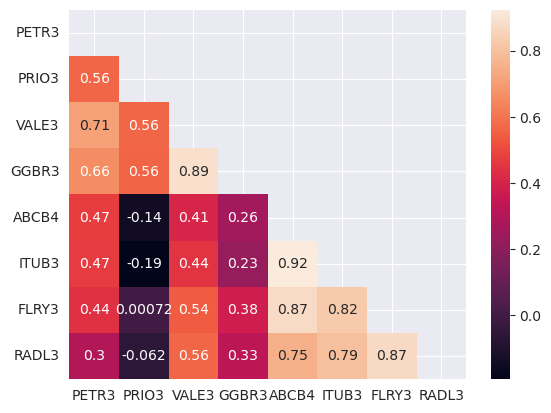

In [24]:
# close correlation
corr_mtrx_close = df_close.rename({col:col.replace(".SA", "") for col in df_close.columns},axis=1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()


mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

sns.heatmap(corr_mtrx_close, annot=True, mask=mask)
plt.show()

### moving std and meta 

In [ ]:
df_dp.reset_index(drop=False)['Date']

In [ ]:
df_dp['month'] = df_dp.reset_index(drop=False)['Date'].dt.month.to_numpy()
df_dp['year'] = df_dp.reset_index(drop=False)['Date'].dt.year.to_numpy()
df_dp['day'] = df_dp.reset_index(drop=False)['Date'].dt.day.to_numpy()
df_dp['x'] = df_dp.apply(lambda x: f'{int(x.month)}-{int(x.day)}', axis = 1)
df_dp

In [ ]:
sns.set_theme(rc={'figure.figsize':(40,20)})
sns.lineplot(
    data=df_dp.sort_values('x'), 
    x="x", 
    y="PETR3.SA",
    hue = "year", 
    lw=1,
    
    )

#### Describe

In [ ]:
df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe()

In [ ]:
print(df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe().round(2).to_latex(float_format="%.2f"))

In [ ]:
df_dp_int.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe()

In [ ]:
print(df_dp_int.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe().round(2).to_latex(float_format="%.2f"))

In [ ]:
sns.boxplot(data=df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1))

In [ ]:
sns.boxplot(data=df_dp_int.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1))

#### Correlation

In [ ]:
# close correlation
corr_mtrx_close = df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()


mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

sns.heatmap(corr_mtrx_close, annot=True, mask=mask)
plt.show()

In [ ]:
# close correlation
corr_mtrx_close = df_dp_int.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()


mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

sns.heatmap(corr_mtrx_close, annot=True, mask=mask)
plt.show()

#### Decompose

In [ ]:
!pip install statsmodels

In [ ]:
df_dp

In [ ]:
# Resample para frequência mensal (caso os dados não sejam diários, ajuste conforme necessário)
df_resampled = df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).resample('M').mean()
df_resampled

In [ ]:
for asset in list_assets:

    # Decomposição sazonal com período anual (12 meses)
    result = seasonal_decompose(df_resampled[asset.replace(".SA", "")], model='additive', period=12)

    # Plotar os componentes da decomposição
    result.plot()
    plt.show()